# Walmart Sales Analysis

This project explores Walmart sales data to uncover trends, identify business insights, and propose growth strategies.

Using demographic and transactional data, we aim to:

- Identify and analyze high-spending customer segments based on total spend and behavioral patterns.

- Understand purchasing behavior across gender, age, occupation, and city to uncover strategic insights.

- Explore co-purchase patterns among top spenders to inform potential product bundling opportunities.

- Evaluate product-level performance among key demographics to prioritize marketing efforts.

- Derive actionable business strategies for sales, product targeting, and customer engagement based on data-backed trends.

The data used for this analysis comes from the e-Commerce (Walmart) Sales Dataset available on Kaggle.

### Notebook Outline

1. **Data Loading and Preprocessing**
- Import Packages  
- Import Dataset  
- Understand Structure and Data Types  
- Handle Missing Values and Clean Data  
- Convert and Format Relevant Columns  

2. **Exploratory Data Analysis (EDA)**
- Overview of Customer Demographics  
- Purchase Trends by Age, Gender, Occupation, Marital Status  
- Spending Patterns Across Cities and Stay Duration  
- Product Categories Performance  
- Top Selling Products  

3. **Customer Segmentation & Behavioral Insights**
- Segmenting Customers by Purchase Behavior  
- Demographics of High-Spending Customers  
- Purchase Patterns by Age and Gender  
- High-Spending Customer Spending Behavior  
- Co-Purchase Behavior  

4. **Strategic Insights & Recommendations**
- Key Takeaways from Analysis  
- Data-backed Suggestions for Marketing, Sales, and Business Growth



# 1.Data Loading and Preprocessing

### 1.1 Importing Packages

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### 1.2 Importing Dataset

In [448]:
df = pd.read_csv("walmartData.csv")

In [449]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### 1.3 Understand Structure and Data Types


In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Additional column information:

0. User_ID: User ID
1. Product_ID: Product ID
2. Gender: Sex of User
3. Age: Age in bins
4. Occupation: Occupation(Masked)
5. City_Category: Category of the City (A,B,C)
6. StayInCurrentCityYears: Number of years stay in current city
7. Marital_Status: Marital Status
8. ProductCategory: Product Category (Masked)
9. Purchase: Purchase Amount

In [451]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### 1.4 Handle Missing Values and Clean Data

In [452]:
df.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [453]:
df.drop_duplicates(inplace=True)

### 1.5 Convert and Format Relevant Columns

In [454]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)

age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

df['Product_Category'] = df['Product_Category'].astype('category')

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  int64   
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(2), int64(5), object(3)
memory usage: 34.6+ MB


# 2.Exploratory Data Analysis (EDA)

### 2.1 Overview of Customer Demographics

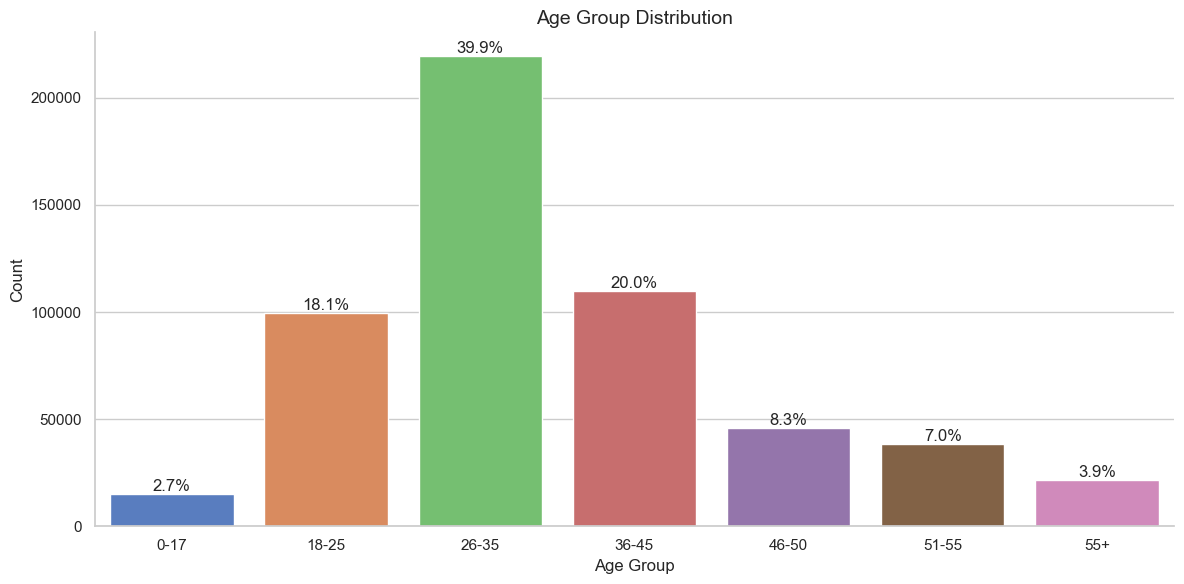

In [456]:
# Age Group Distribution
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Age', data=df, palette='muted', order=df['Age'].cat.categories)

for p in ax.patches:
    percentage = 100 * p.get_height() / len(df)
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Count')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


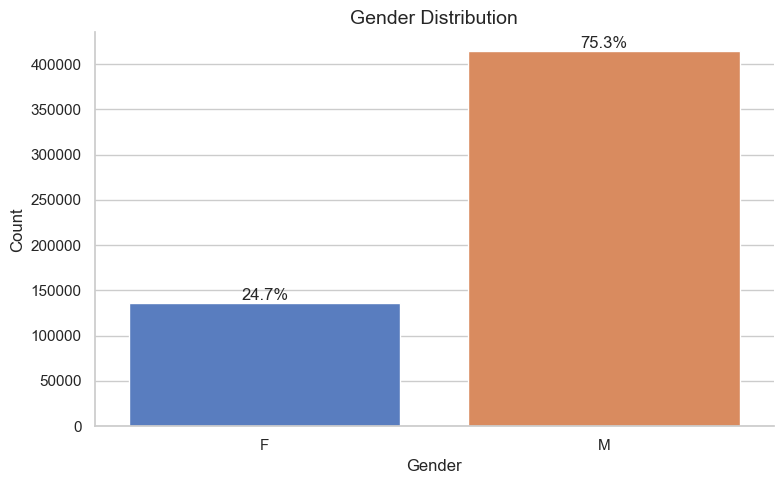

In [457]:
# Gender Distrubution
gender_counts = df['Gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
ax = sns.countplot(x='Gender', data=df, palette='muted')

for p in ax.patches:
    percentage = 100 * p.get_height() / len(df)
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


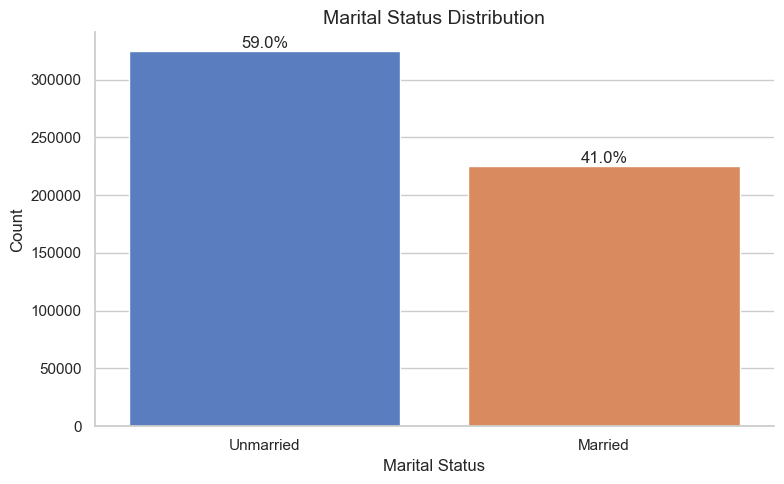

In [458]:
# Marital Status Distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Marital_Status', data=df, palette='muted')

ax.set_xticklabels(['Unmarried', 'Married'])

for p in ax.patches:
    percentage = 100 * p.get_height() / len(df)
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title('Marital Status Distribution', fontsize=14)
plt.xlabel('Marital Status')
plt.ylabel('Count')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


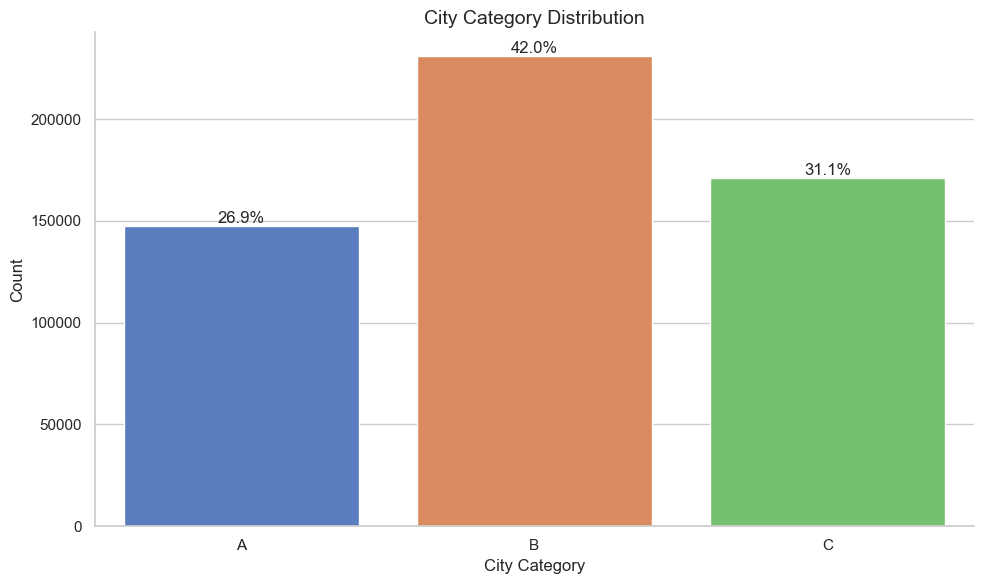

In [459]:
# City Category Distribution

city_order = ['A', 'B', 'C']

plt.figure(figsize=(10,6))
ax = sns.countplot(x='City_Category', data=df, palette='muted', order=city_order)

for p in ax.patches:
    percentage = 100 * p.get_height() / len(df)
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title('City Category Distribution', fontsize=14)
plt.xlabel('City Category')
plt.ylabel('Count')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


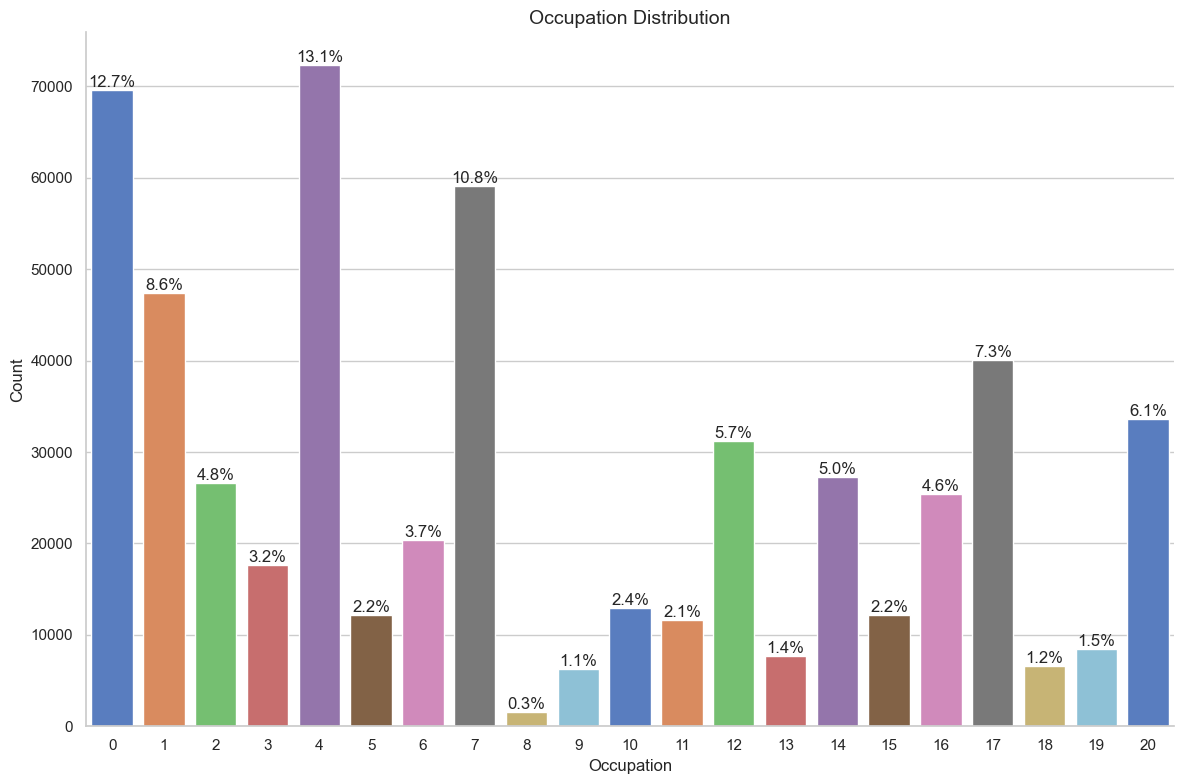

In [460]:
# Occupation Distribution
plt.figure(figsize=(12,8))

ordered_occupation = sorted(df['Occupation'].unique())

ax = sns.countplot(x='Occupation', data=df, palette='muted', order=ordered_occupation)

for p in ax.patches:
    percentage = 100 * p.get_height() / len(df)
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title('Occupation Distribution', fontsize=14)
plt.xlabel('Occupation')
plt.ylabel('Count')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


### 2.2 Purchase Trends by Age, Gender, Occupation, Marital Status

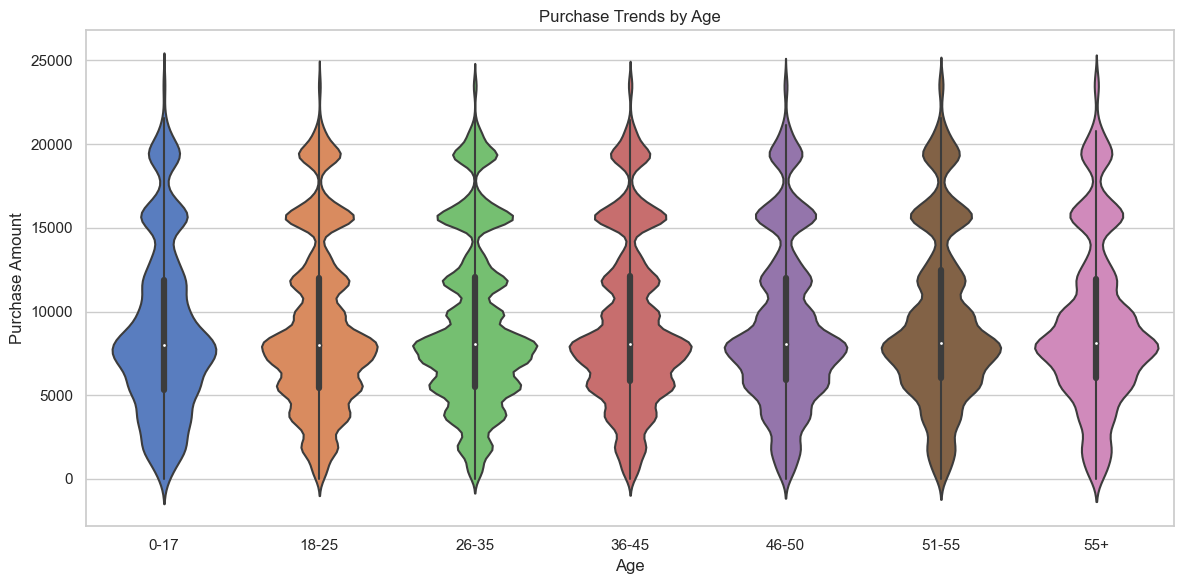

In [461]:
# Purchase Trends by Age
plt.figure(figsize=(12,6))
sns.violinplot(x='Age', y='Purchase', data=df, palette='muted')
plt.title('Purchase Trends by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.tight_layout()
plt.show()


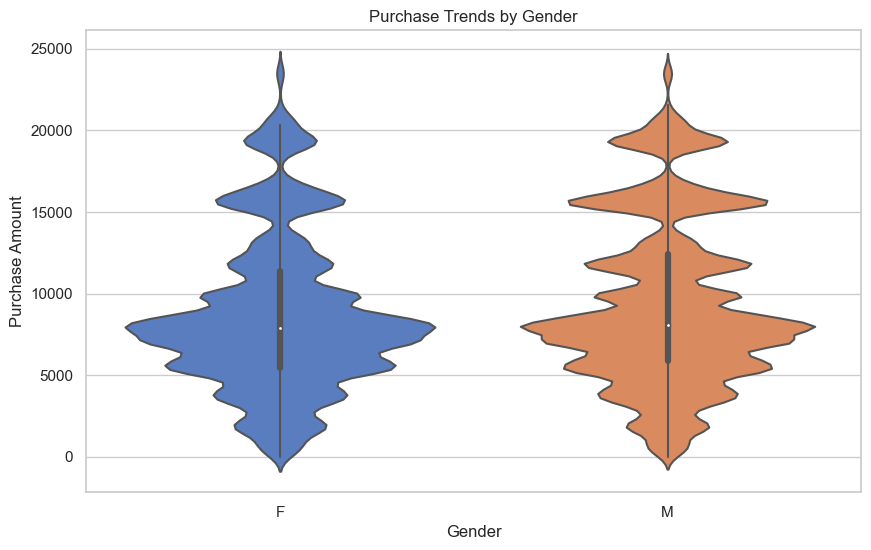

In [462]:
# Purchase Trends by Gender
plt.figure(figsize=(10,6))
sns.violinplot(x='Gender', y='Purchase', data=df, palette='muted')
plt.title('Purchase Trends by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

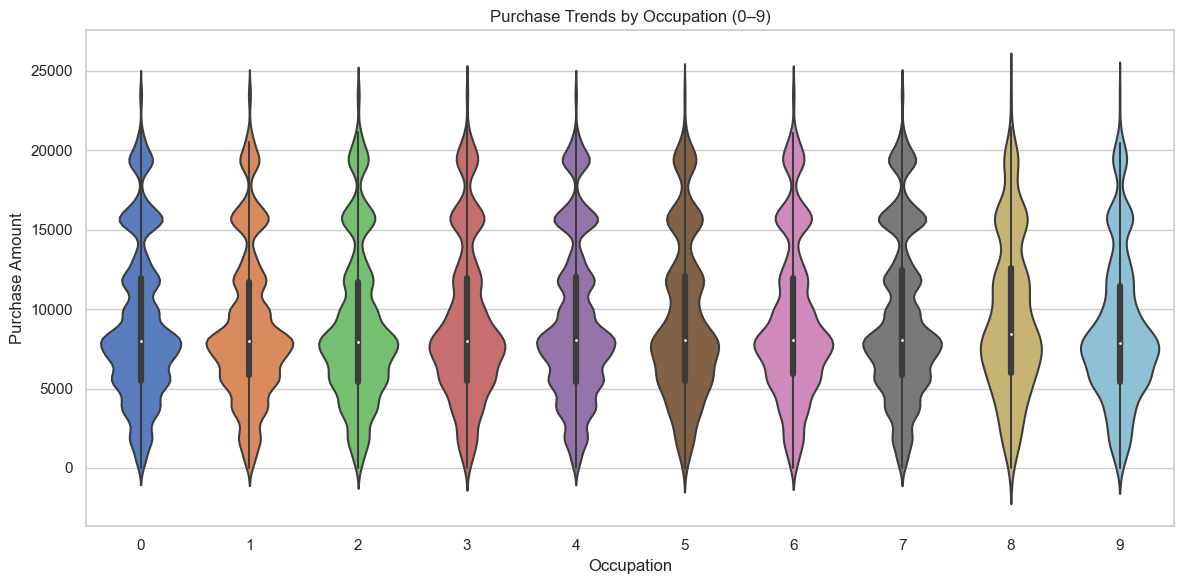

In [463]:
# Purchase Trends by Occupation
df_occ_low = df[df['Occupation'] <= 9]
df_occ_high = df[df['Occupation'] >= 10]

# First plot: Occupation 0-9
plt.figure(figsize=(12,6))
sns.violinplot(x='Occupation', y='Purchase', data=df_occ_low, palette='muted')
plt.title('Purchase Trends by Occupation (0–9)')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.tight_layout()
plt.show()


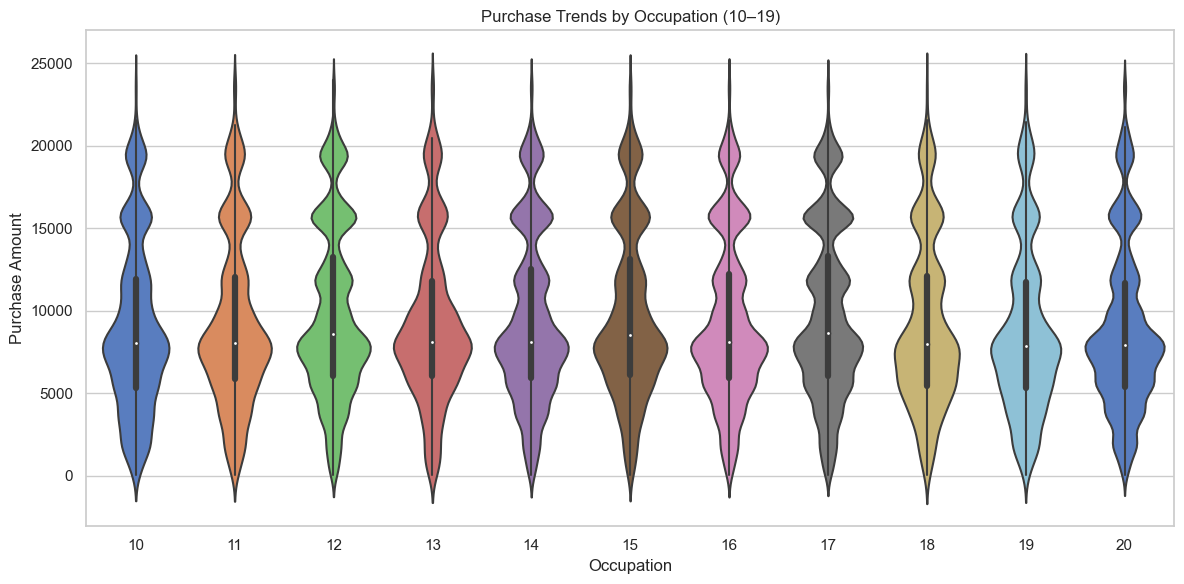

In [464]:
# Second plot: Occupation 10-19
plt.figure(figsize=(12,6))
sns.violinplot(x='Occupation', y='Purchase', data=df_occ_high, palette='muted')
plt.title('Purchase Trends by Occupation (10–19)')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.tight_layout()
plt.show()

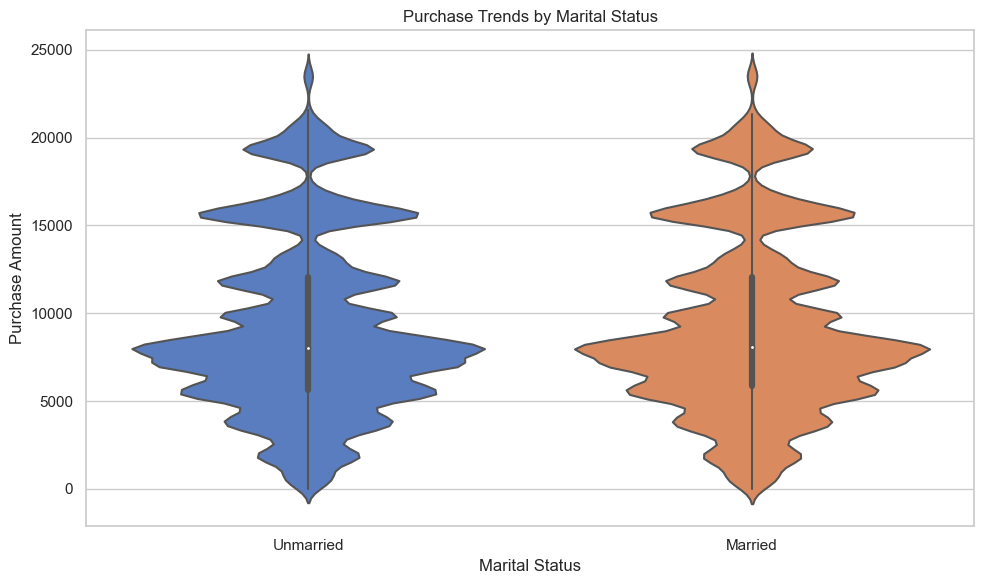

In [465]:
# Purchase Trends by Marital Status
plt.figure(figsize=(10,6))
ax = sns.violinplot(x='Marital_Status', y='Purchase', data=df, palette='muted')
ax.set_xticklabels(['Unmarried', 'Married'])
plt.title('Purchase Trends by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')
plt.tight_layout()
plt.show()


### 2.3 Spending Patterns Across Cities and Stay Duration

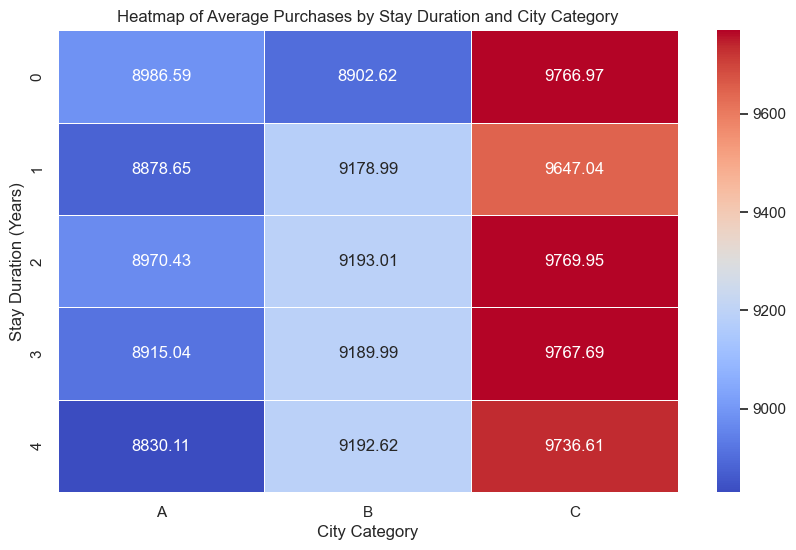

In [466]:
heatmap_data = df.pivot_table(index='Stay_In_Current_City_Years', columns='City_Category', values='Purchase', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Average Purchases by Stay Duration and City Category')
plt.xlabel('City Category')
plt.ylabel('Stay Duration (Years)')
plt.show()


### 2.4 Product Categories Performance

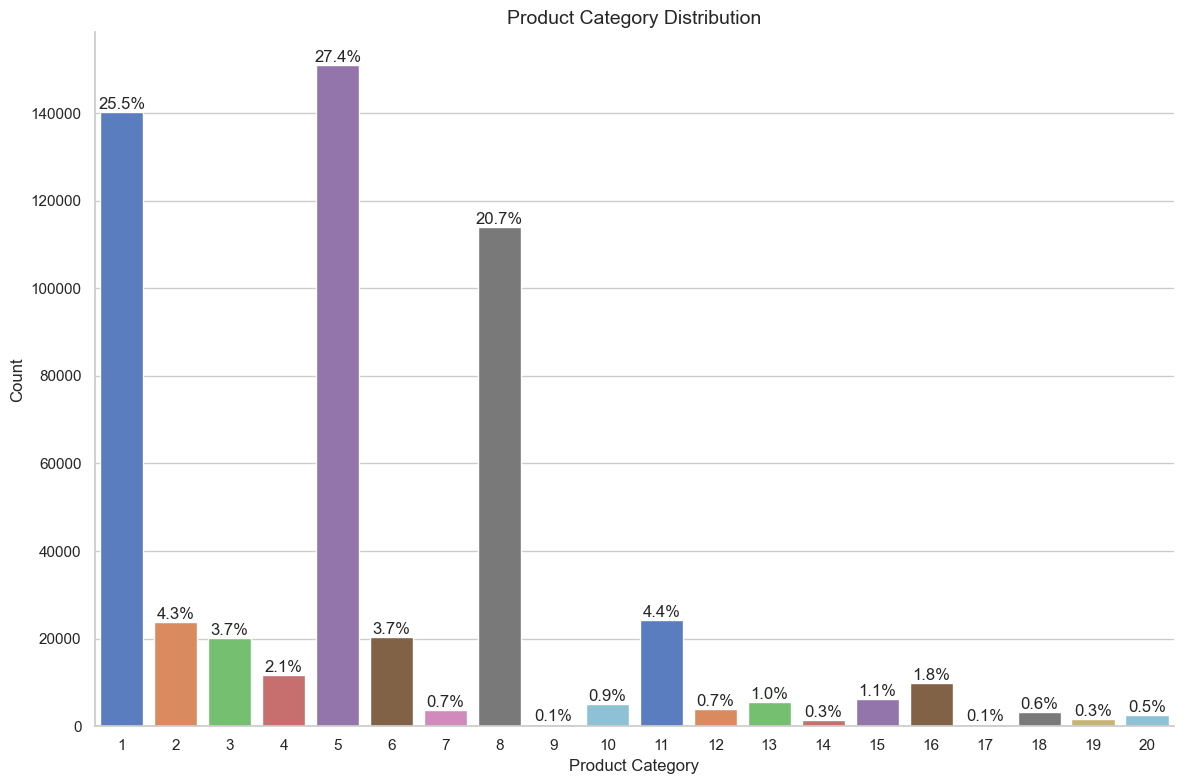

In [467]:
# Occupation Distribution
plt.figure(figsize=(12,8))

ordered_product_category = sorted(df['Product_Category'].unique())

ax = sns.countplot(x='Product_Category', data=df, palette='muted', order=ordered_product_category)

for p in ax.patches:
    percentage = 100 * p.get_height() / len(df)
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title('Product Category Distribution', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Count')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


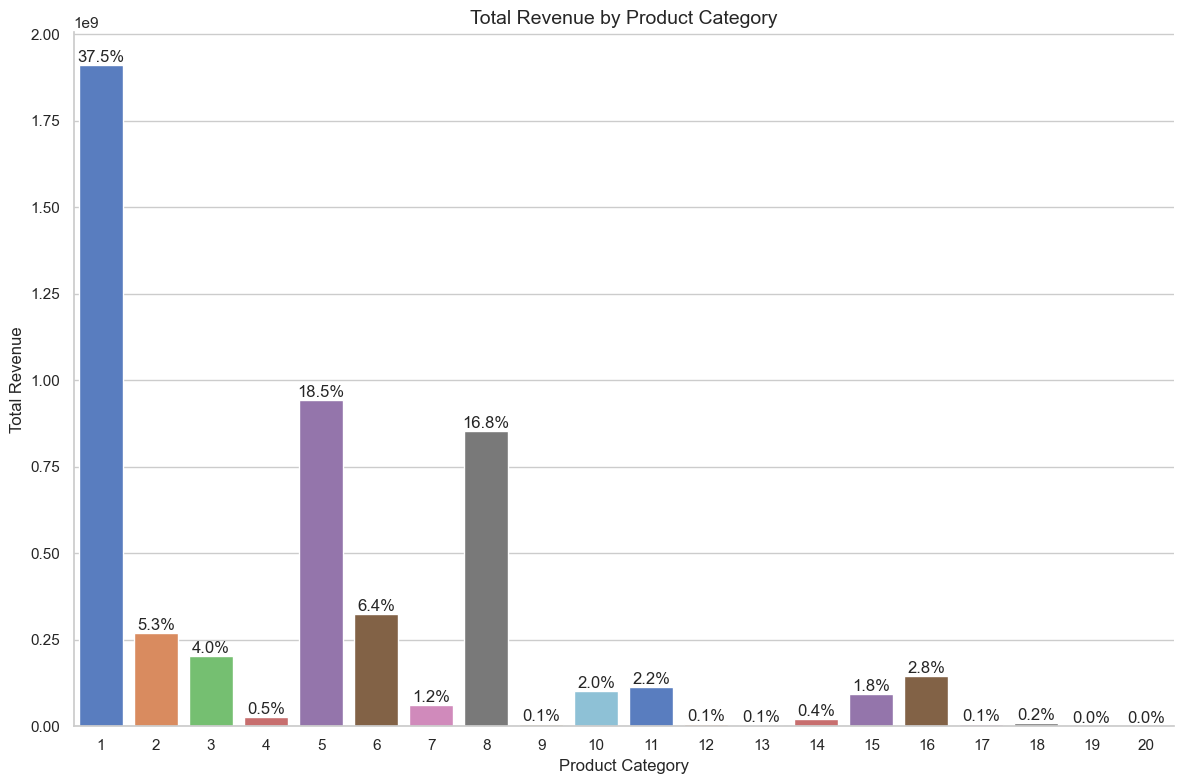

In [468]:
revenue_by_category = df.groupby('Product_Category')['Purchase'].sum().reset_index()

revenue_by_category = revenue_by_category.sort_values('Purchase', ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x='Product_Category', y='Purchase', data=revenue_by_category, palette='muted')


for p in ax.patches:
    percentage = 100 * p.get_height() / revenue_by_category['Purchase'].sum()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title('Total Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


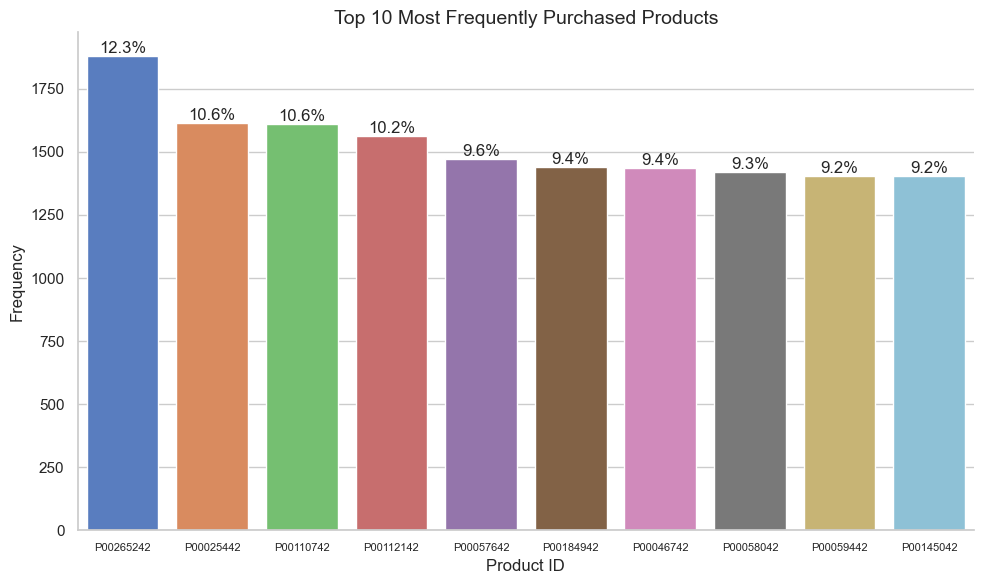

In [469]:
top_products = df['Product_ID'].value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_products.index, y=top_products.values, palette='muted')

for p in ax.patches:
    percentage = 100 * p.get_height() / top_products.sum()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title('Top 10 Most Frequently Purchased Products', fontsize=14)
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.xticks(fontsize = 8)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()



# 3.Customer Segmentation & Behavioral Insights

### 3.1 Segmenting Customers by Purchase Behavior

In [470]:
purchase_data = df[['Purchase']].copy()

scaler = StandardScaler()
purchase_scaled = scaler.fit_transform(purchase_data)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

df['KMeans_Segment'] = kmeans.fit_predict(purchase_scaled)

cluster_labels = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
df['KMeans_Segment'] = df['KMeans_Segment'].map(cluster_labels)

cluster_means = df.groupby('KMeans_Segment')['Purchase'].mean()
print("Initial cluster means:")
print(cluster_means)

Initial cluster means:
KMeans_Segment
Cluster 1    17047.816338
Cluster 2     9037.200016
Cluster 3     4116.316201
Name: Purchase, dtype: float64


In [471]:
label_mapping = {
    'Cluster 3': 'Low Spend',
    'Cluster 2': 'Mid Spend',
    'Cluster 1': 'High Spend'
}

df['KMeans_Segment'] = df['KMeans_Segment'].map(label_mapping)

cluster_means = df.groupby('KMeans_Segment')['Purchase'].mean()
print("\nCluster means after relabeling:")
print(cluster_means)


Cluster means after relabeling:
KMeans_Segment
High Spend    17047.816338
Low Spend      4116.316201
Mid Spend      9037.200016
Name: Purchase, dtype: float64


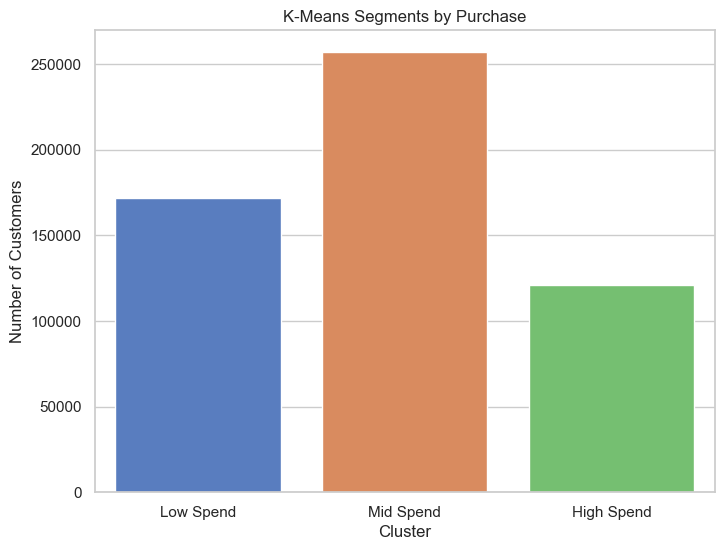

In [472]:
cluster_order = ['Low Spend', 'Mid Spend', 'High Spend']
plt.figure(figsize=(8,6))
sns.countplot(x='KMeans_Segment', data=df, palette='muted', order=cluster_order)
plt.title('K-Means Segments by Purchase')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


### 3.2 Demographics of High-Spending Customers

In [473]:
# Filter to high-spend customers
high_spend_df = df[df['KMeans_Segment'] == 'High Spend']

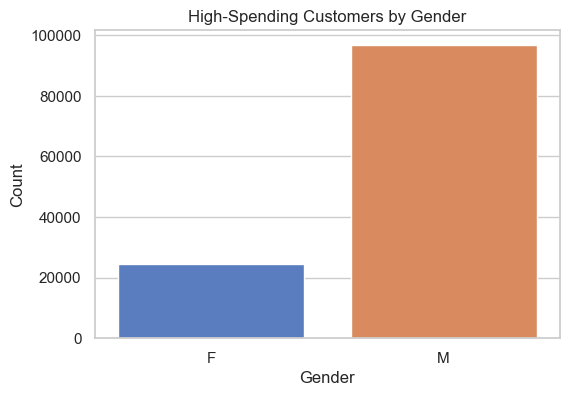

In [474]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=high_spend_df, palette='muted')
plt.title('High-Spending Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


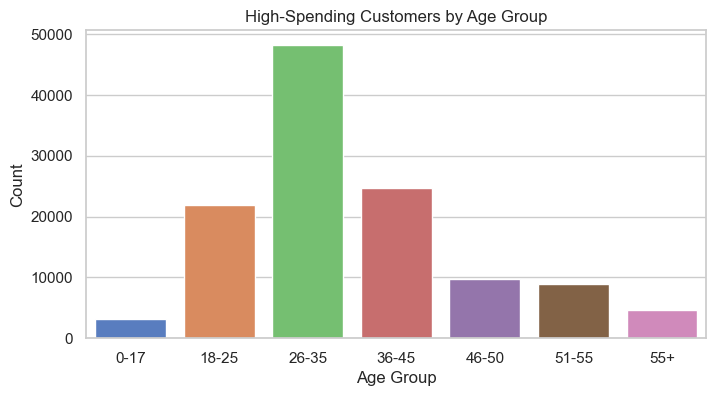

In [475]:
plt.figure(figsize=(8,4))
sns.countplot(x='Age', data=high_spend_df, palette='muted')
plt.title('High-Spending Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


### 3.3 Purchase Patterns by Age and Gender  


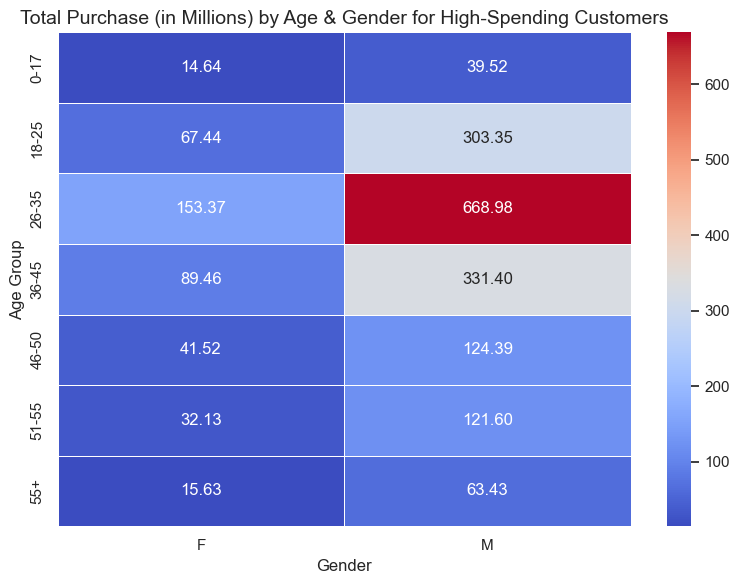

In [476]:
pivot = high_spend_df.pivot_table(
    index='Age',
    columns='Gender',
    values='Purchase',
    aggfunc='sum'
)

pivot_m = pivot / 1_000_000 

# Plot combined heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_m,
    annot=True,
    fmt='.2f', 
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white'
)
plt.title('Total Purchase (in Millions) by Age & Gender for High-Spending Customers', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 3.4 High-Spending Customer Spending Behavior


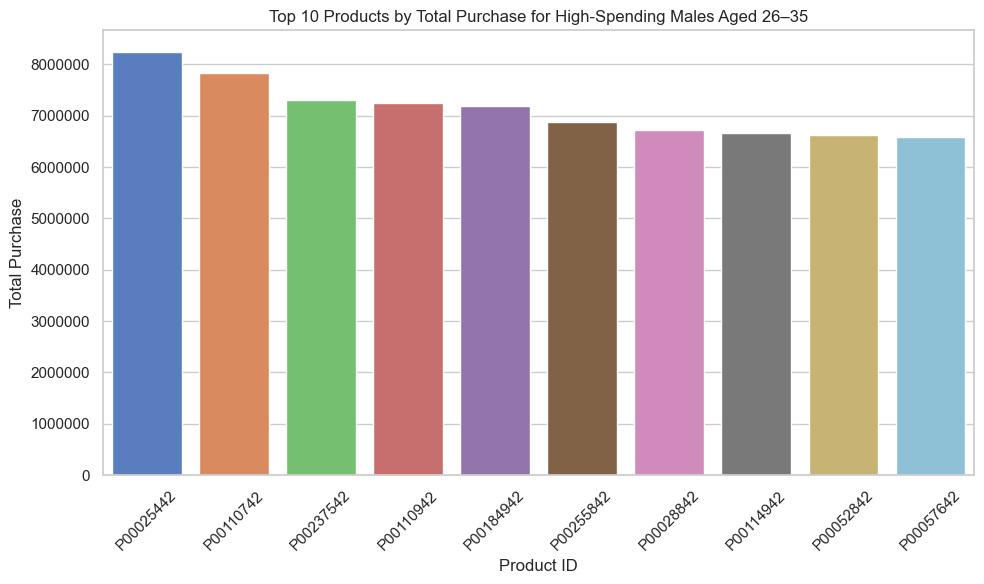

In [477]:
h_males_26_35 = high_spend_df[(high_spend_df['Gender'] == 'M') & (high_spend_df['Age'] == '26-35')]

# Top 10 products by total purchase
top_products = (
    h_males_26_35.groupby('Product_ID')['Purchase']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products_df = top_products.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_products_df,
    x='Product_ID',
    y='Purchase',
    palette='muted'
)
plt.title('Top 10 Products by Total Purchase for High-Spending Males Aged 26–35')
plt.xlabel('Product ID')
plt.ylabel('Total Purchase')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


### 3.5 Co-Purchase Behavior

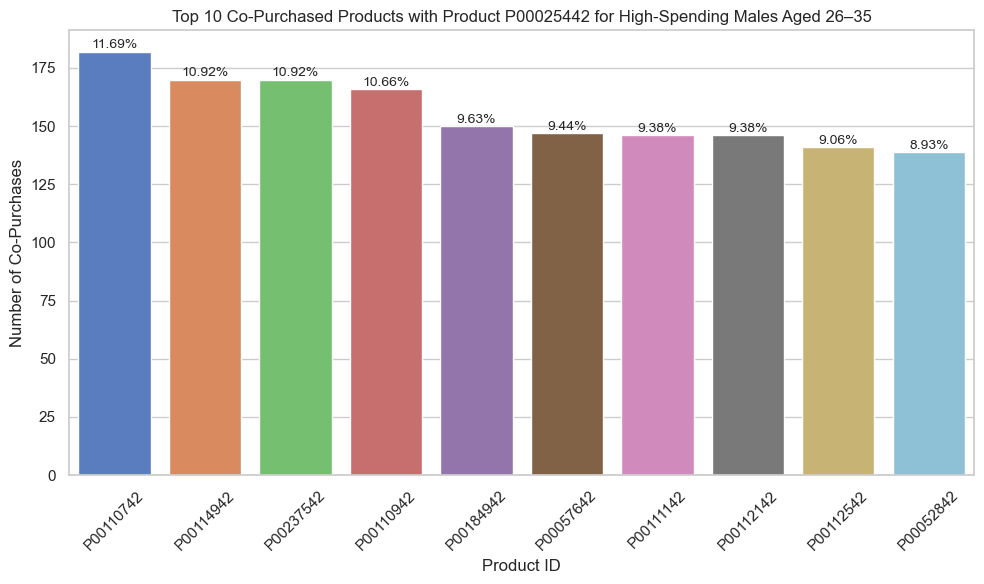

In [478]:
P00025442_buyers = h_males_26_35[h_males_26_35['Product_ID'] == 'P00025442']['User_ID']


co_purchases = h_males_26_35[
    (h_males_26_35['User_ID'].isin(P00025442_buyers)) &
    (h_males_26_35['Product_ID'] != 'P00025442')
]

co_purchase_counts = co_purchases['Product_ID'].value_counts().head(10)
co_purchase_percentages = (co_purchase_counts / co_purchase_counts.sum()) * 100

co_purchase_df = co_purchase_counts.reset_index()
co_purchase_df.columns = ['Product_ID', 'Count']
co_purchase_df['Percentage'] = co_purchase_percentages.values


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=co_purchase_df, x='Product_ID', y='Count', palette='muted')

for i, row in co_purchase_df.iterrows():
    ax.text(i, row['Count'] + 0.05, f"{row['Percentage']:.2f}%", ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Co-Purchased Products with Product P00025442 for High-Spending Males Aged 26–35')
plt.xlabel('Product ID')
plt.ylabel('Number of Co-Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4.Strategic Insights & Recommendations


### 4.1 Key Takeaways from Analysis

- The majority of customers are male, as shown in *Section 2.1: Overview of Customer Demographics*.
- Across all demographic groups, purchase amounts tend to cluster in the **5,000–10,000** range (*Section 2.2: Purchase Trends by Age, Gender, Occupation, and Marital Status*).
- Product categories **1, 5, and 8** together account for **72.8% of total revenue**, as highlighted in *Section 2.4: Product Categories Performance*.
- In contrast, product categories **9, 12, 13, 14, 17, 18, 19, and 20** collectively contribute **less than 1%** of total revenue (*Section 2.4*).
- Length of stay in a city does not appear to impact spending behavior, as observed in *Section 2.3: Spending Patterns Across Cities and Stay Duration*.
- High-spending customers are predominantly **males aged 26–35**, who contribute the highest total purchases among all segments (*Section 3.3: Demographics of High-Spending Customers*).
- Product **P00025442** emerges as a top choice among high-spending customers (*Section 3.4: High-Spending Customer Spending Behavior*), while **P00265242** is the top-performing product overall (*Section 2.4*).
- Co-purchase analysis in *Section 3.5: Product Bundling Opportunities* shows that when **P00025442** is bought by high-spending males aged 26–35, it is most frequently purchased alongside **P00110741**, followed by **P00114942**, **P00237542**, and **P00110942**.


### 4.2 Data-backed Suggestions for Marketing, Sales, and Business Growth

- **Target High-Spending Males Aged 26–35**: Focus marketing efforts on **high-spending males aged 26–35**, identified as the predominant group in *Section 3.3: Demographics of High-Spending Customers*. Capitalize on their purchasing power to increase revenue.

- **Target Campaigns for Mid-Range Spenders**: Develop **targeted campaigns** for customers whose purchase amounts fall within the **5,000–10,000 range**, as seen in *Section 2.2: Purchase Trends by Age, Gender, Occupation, and Marital Status*. Tailor marketing messages to this majority group to increase conversion rates.

- **Promote High-Revenue Product Categories**: **Promote product categories 1, 5, and 8**, which together contribute **72.8% of total revenue**, as indicated in *Section 2.4: Product Categories Performance*. Use strategies such as email marketing, special offers, or recommendations to boost sales within these categories.

- **Re-evaluate Low-Performing Product Categories**: **Re-evaluate** or **discontinue marketing efforts** for product categories **9, 12, 13, 14, 17, 18, 19, and 20**, which contribute less than 1% of total revenue, as seen in *Section 2.4: Product Categories Performance*. Shift focus to the higher-performing product categories to maximize return on marketing spend.

- **Feature Top-Performing Products in Campaigns**: **Feature Product P00025442** more prominently in promotional campaigns, as it stands out in *Section 3.4: High-Spending Customer Spending Behavior*. Similarly, promote **Product P00265242**, which is the top-performing product across all demographics (*Section 2.4*).

- **Introduce Co-Purchase Promotions**: Introduce **co-purchase promotions** that bundle **P00025442** with its most frequently co-purchased products, such as **P00110741**, **P00114942**, **P00237542**, and **P00110942**, as found in *Section 3.5: Product Bundling Opportunities*. This could increase average order value and enhance customer satisfaction by creating more personalized shopping experiences.
